In [3]:
# STEP 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()


Saving Online Sales Data.csv to Online Sales Data.csv


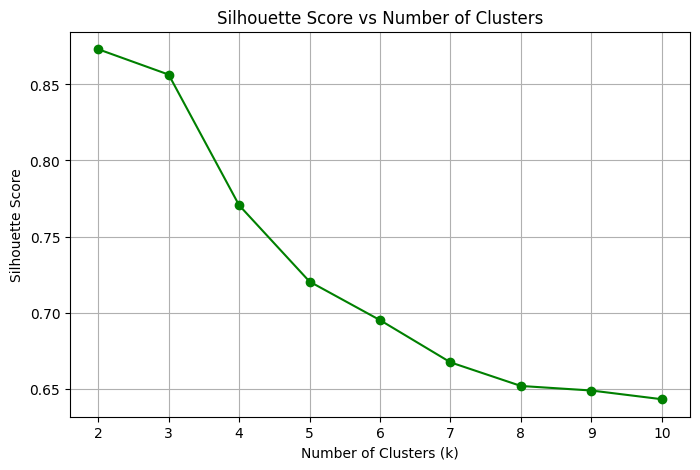


✅ Best number of clusters based on silhouette: 2


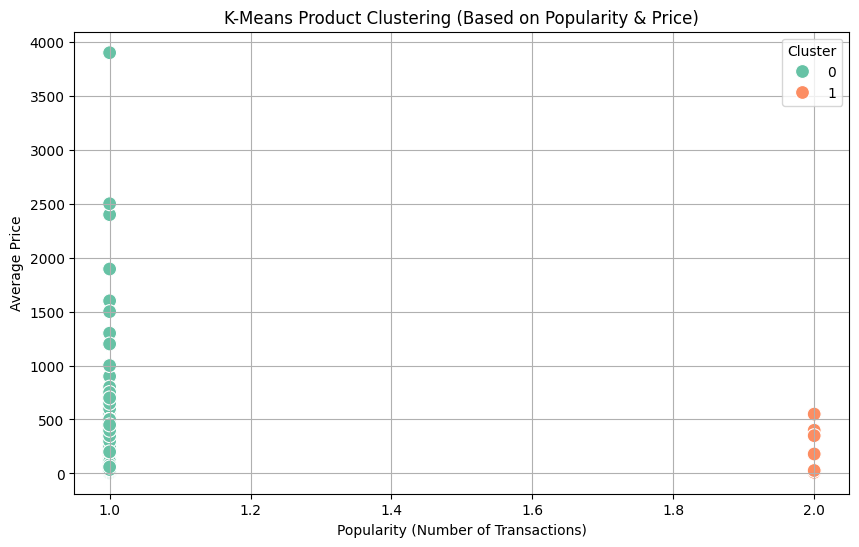


📊 Cluster Summary:
         Popularity  Average Price
Cluster                           
0               1.0         239.46
1               2.0         193.49

🔹 Top 5 Products in Cluster 0:
                          Product Name  Popularity  Average Price
0                1984 by George Orwell           1          19.99
1              Adidas 3-Stripes Shorts           1          29.99
2         Adidas Essential Track Pants           1          44.99
3       Adidas FIFA World Cup Football           1          29.99
4  Adidas Originals Superstar Sneakers           1          79.99

🔹 Top 5 Products in Cluster 1:
                    Product Name  Popularity  Average Price
56         Dune by Frank Herbert           2          17.99
58   Dyson Supersonic Hair Dryer           2         399.99
79         Garmin Forerunner 945           2         549.99
103  Keurig K-Elite Coffee Maker           2         179.99
172   Sony WH-1000XM4 Headphones           2         349.99


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# STEP 2: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("Online Sales Data.csv")

# STEP 3: Preprocessing
df = df.dropna(subset=["Product Name", "Unit Price", "Transaction ID"])
df["Unit Price"] = pd.to_numeric(df["Unit Price"], errors="coerce")
df = df.dropna(subset=["Unit Price"])


# STEP 4: Group by Product Name to get Popularity and Avg Price
product_df = df.groupby("Product Name").agg({
    "Transaction ID": "nunique",
    "Unit Price": "mean"
}).rename(columns={
    "Transaction ID": "Popularity",
    "Unit Price": "Average Price"
}).reset_index()


# STEP 5: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(product_df[["Popularity", "Average Price"]])


# STEP 6: Find optimal number of clusters using Silhouette Score
silhouette_scores = []
K = list(range(2, 11))  # Start from 2 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()


# STEP 7: Apply KMeans using best k (e.g., highest silhouette score)
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✅ Best number of clusters based on silhouette: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42)
product_df["Cluster"] = kmeans.fit_predict(scaled_features)



# STEP 8: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_df, x="Popularity", y="Average Price", hue="Cluster", palette="Set2", s=100)
plt.title("K-Means Product Clustering (Based on Popularity & Price)")
plt.xlabel("Popularity (Number of Transactions)")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()


# STEP 9: Cluster Summary
print("\n📊 Cluster Summary:")
print(product_df.groupby("Cluster")[["Popularity", "Average Price"]].mean().round(2))

# STEP 10: Top Products in Each Cluster
for c in sorted(product_df["Cluster"].unique()):
    print(f"\n🔹 Top 5 Products in Cluster {c}:")
    top = product_df[product_df["Cluster"] == c] \
            .sort_values("Popularity", ascending=False) \
            [["Product Name", "Popularity", "Average Price"]].head(5)
    print(top)


# STEP 11: Save as CSV and Download
product_df.to_csv("Clustered_Products.csv", index=False)
files.download("Clustered_Products.csv")
